<a href="https://colab.research.google.com/github/tobyzawthuhtet/landuse_landcover_classification_with_deep_learning/blob/main/Maize_Crop_classification_using_Sentinel_2_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyrsgis

Installing mendatory libaries
bold text

In [2]:
  
import os
import numpy as np
from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

from tensorflow import keras


import glob

Warning! matplotlib_scalebar library not found. You may not be able to export map directly.


Changing Directory to load data

In [3]:
ls

drive/  sample_data/


In [4]:
os.chdir('/content/drive/MyDrive/Maize Classification using DL')

In [13]:
data = glob.glob("*.tif")
for i in data:
  print(i)

Maize Detection using google earth engine.tif
training_labels.tif
Training-Image .tif
testing_data.tif
Test_CropNN_predicted.tif


In [14]:
mxTraining = 'Training-Image .tif'
builtupTraining = 'training_labels.tif'
mxTesting = 'testing_data.tif'


Reading bands from imageries

In [15]:
ds1, featuresTrain = raster.read(mxTraining, bands='all')
ds2, labelTrain = raster.read(builtupTraining, bands=1)
ds3, featuresTest = raster.read(mxTesting, bands='all')



In [16]:
print("Bangalore Multispectral image shape: ", featuresTrain.shape)
print("Bangalore Binary crop image shape: ", labelTrain.shape)
print("Hyderabad Multispectral image shape: ", featuresTest.shape)


Bangalore Multispectral image shape:  (13, 296, 336)
Bangalore Binary crop image shape:  (296, 336)
Hyderabad Multispectral image shape:  (13, 2568, 1928)


In [17]:
labelTrain = (labelTrain == 1).astype(int)

In [18]:
print("Training Multispectral image shape: ", featuresTrain.shape)
print("Training Binary built-up image shape: ", labelTrain.shape)
print("Testing Multispectral image shape: ", featuresTest.shape)


Training Multispectral image shape:  (13, 296, 336)
Training Binary built-up image shape:  (296, 336)
Testing Multispectral image shape:  (13, 2568, 1928)


In [19]:
featuresTrain = changeDimension(featuresTrain)
labelTrain = changeDimension (labelTrain)
featuresTest = changeDimension(featuresTest)
nBands = featuresTrain.shape[1]

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(featuresTrain, labelTrain, test_size=0.4, random_state=42)


In [ ]:
print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

(59673, 13)
(59673,)
(39783, 13)
(39783,)


In [ ]:
xTrain = xTrain / 255.0
xTest = xTest / 255.0
featuresTest = featuresTest / 255.0


In [ ]:
xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))


In [ ]:
featuresTest = featuresTest.reshape((featuresTest.shape[0], 1, featuresTest.shape[1]))


In [ ]:
print(xTrain.shape, xTest.shape,featuresTest.shape)

(59673, 1, 13) (39783, 1, 13) (4951104, 1, 13)


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, nBands)),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(13 , activation = 'relu'),
    keras.layers.Dense(2, activation='softmax')])

# Define the accuracy metrics and parameters
#opt = keras.optimizers.Adam(learning_rate=0.0008)
model.compile(optimizer='Adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Run the model
history = model.fit(xTrain, yTrain,batch_size=10 ,validation_split=0.3, epochs=30)

Epoch 1/30
4178/4178 [==============================] - 7s 2ms/step - loss: 0.6511 - accuracy: 0.6205 - val_loss: 0.6032 - val_accuracy: 0.6446
Epoch 2/30
4178/4178 [==============================] - 6s 2ms/step - loss: 0.6039 - accuracy: 0.6492 - val_loss: 0.5853 - val_accuracy: 0.6538
Epoch 3/30
4178/4178 [==============================] - 6s 2ms/step - loss: 0.5822 - accuracy: 0.6727 - val_loss: 0.5693 - val_accuracy: 0.6905
Epoch 4/30
4178/4178 [==============================] - 6s 2ms/step - loss: 0.5582 - accuracy: 0.6919 - val_loss: 0.5367 - val_accuracy: 0.7057
Epoch 5/30
4178/4178 [==============================] - 6s 2ms/step - loss: 0.5408 - accuracy: 0.7062 - val_loss: 0.5271 - val_accuracy: 0.7137
Epoch 6/30
4178/4178 [==============================] - 6s 2ms/step - loss: 0.5339 - accuracy: 0.7121 - val_loss: 0.5433 - val_accuracy: 0.6838
Epoch 7/30
4178/4178 [==============================] - 6s 2ms/step - loss: 0.5280 - accuracy: 0.7119 - val_loss: 0.5056 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


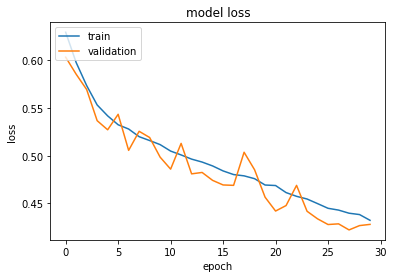

<Figure size 432x288 with 0 Axes>

In [ ]:
  print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Model loss.jpg')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


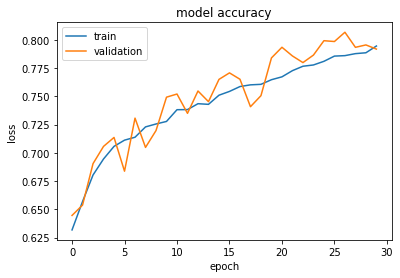

<Figure size 432x288 with 0 Axes>

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Model Accuracy.jpg')

In [ ]:
os.getcwd()

'/content/drive/My Drive/Build Up extraction using DL'

In [73]:
yTestPredicted = model.predict(xTest)
yTestPredicted = yTestPredicted[:,1]

NameError: ignored

In [ ]:
yTestPredicted = (yTestPredicted>0.5).astype(int)
cMatrix = confusion_matrix(yTest, yTestPredicted)
pScore = precision_score(yTest, yTestPredicted)
rScore = recall_score(yTest, yTestPredicted)
print("Confusion matrix: for 14 nodes\n", cMatrix)
print("\nP-Score: %.3f, R-Score: %.3f" % (pScore, rScore))


Confusion matrix: for 14 nodes
 [[16142  2404]
 [ 3690 17547]]

P-Score: 0.880, R-Score: 0.826


In [ ]:
predicted = model.predict(featuresTest)
predicted = predicted[:,1]

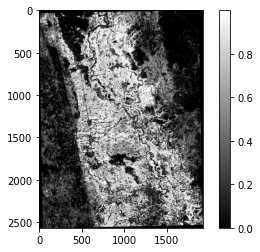

In [ ]:
prediction = np.reshape(predicted, (ds3.RasterYSize, ds3.RasterXSize))
#outFile = 'Test_CropNN_predicted.tif'
#raster.export(prediction, ds3, filename=outFile, dtype='float')
plt.imshow(prediction, cmap='gray')
plt.colorbar()

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Maize Classification using DL'

In [ ]:
model.save('/content/drive/MyDrive/Maize Classification using DL/Maize Detection Model version5.h5')

In [ ]:
ls

 exportTableExample.cpg
 exportTableExample.dbf
 exportTableExample.fix
 exportTableExample.prj
 exportTableExample.shp
 exportTableExample.shx
'Maize Detection Model version2.h5'
'Maize Detection Model version3.h5'
'Maize Detection Model version4.h5'
'Maize Detection Model version5.h5'
'Maize Detection using google earth engine.tif'
'Model Accuracy.jpg'
'Model loss.jpg'
 Test_CropNN_predicted.tif
 testing_data.tif
'Training-Image .tif'
 training_labels.tif


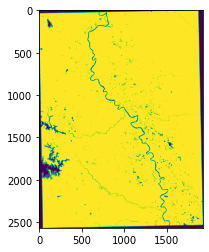

In [75]:
prediction_version5 =prediction(keras.models.load_model('/content/drive/MyDrive/Maize Classification using DL/Maize Detection Model version5.h5'))

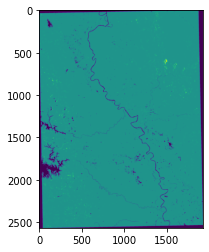

In [76]:
prediction_version4= prediction(keras.models.load_model('/content/drive/MyDrive/Maize Classification using DL/Maize Detection Model version4.h5'))

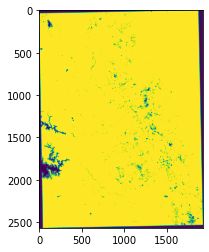

In [77]:
prediction_version3 = prediction(keras.models.load_model('/content/drive/MyDrive/Maize Classification using DL/Maize Detection Model version3.h5'))

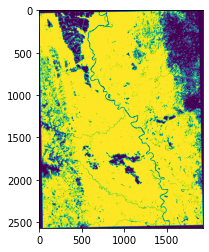

In [78]:
prediction_version2 = prediction(keras.models.load_model('/content/drive/MyDrive/Maize Classification using DL/Maize Detection Model version2.h5'))

In [51]:
def prediction(model):
  #class_model =keras.models.load_model(model)
  classification =model.predict(featuresTest)
  classification = classification[:,1]
  prediction_data = np.reshape(classification, (ds3.RasterYSize, ds3.RasterXSize))
  plt.imshow(prediction_data)
  return(prediction_data)

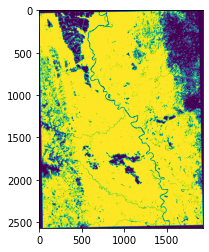

In [57]:
prediction_newdata = prediction(model2)

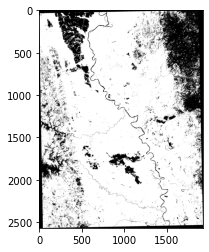

In [58]:
plt.imshow(prediction_newdata,cmap='gray')

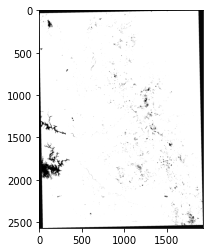

In [61]:
plt.imshow(prediction_version3, cmap='gray')

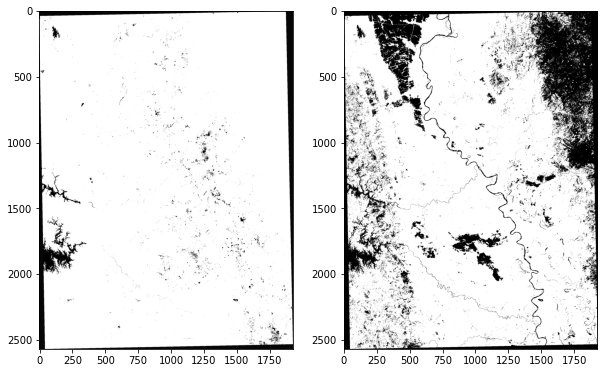

In [71]:
fig= plt.figure(figsize=(10,10))
ax1= fig.add_subplot(121)
ax2= fig.add_subplot(122)

ax1.imshow(prediction_version3, cmap='gray')
ax2.imshow(prediction_newdata,cmap='gray')

In [107]:
def plotting_data( ):
  fig= plt.figure(figsize=(16,16))
  ax1 = fig.add_subplot(221)
  ax2= fig.add_subplot(222)
  ax3 = fig.add_subplot(223)
  ax4 = fig.add_subplot(224)

  ax1.imshow(prediction_version2, cmap='gray')
  ax2.imshow(prediction_version3, cmap='gray')
  ax3.imshow(prediction_version4, cmap='gray')
  ax4.imshow(prediction_version5, cmap='gray')

  ax1.set_title('Model version 5')
  ax2.set_title('Model version 4')
  ax3.set_title('Model version 3')
  ax4.set_title('Model version 2')
  

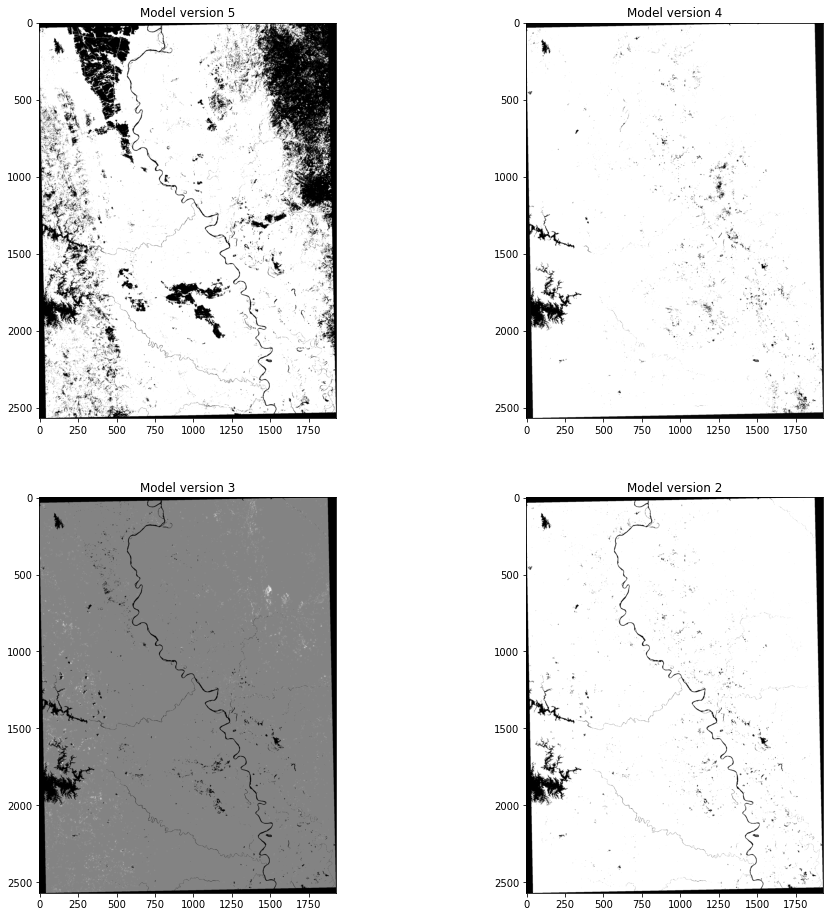

In [108]:
plotting_data()
